In [215]:
import numpy as np 
import matplotlib.pyplot as plt

In [216]:
data_count = 500
test_percent = 0.3
train_count = round(data_count * (1 - test_percent))
test_count = round(data_count * test_percent)
# random data from 1000 to 3000 (the area of the house in feet^2)
x_train = np.random.rand(train_count) * 2000 + 1000
x_test = np.random.rand(test_count) * 2000 + 1000   
# generate an array with data_count length with random values from 230 to 300
# these coficcients will be used to generate y_train 
coficcients = np.random.rand(data_count) * 70 + 230  
# generate y_train (the price of the house in $)
y_train = x_train * coficcients[0:train_count]
y_test = x_test * coficcients[train_count:data_count]
print(y_train[0:10])      


[513422.33267281 627265.56923273 618687.11529899 666359.98299588
 497731.23088048 683118.39104523 281994.12139709 421071.45135707
 350892.99268741 559142.52427969]


In [217]:
# normalize data
def normalize_data(data):
    return (data - np.mean(data)) / np.std(data)
def unnormalize_data(data, original_data):
    return data * np.std(original_data) + np.mean(original_data)
# subtract the mean and divide by the standard deviation
original_x = x_train
original_y = y_train
x_train = normalize_data(x_train)
y_train = normalize_data(y_train)
print(y_train[0:10])

[-0.09422817  0.67927521  0.62098925  0.94490067 -0.20084074  1.05876501
 -1.66665804 -0.7217026  -1.19852737  0.21641587]


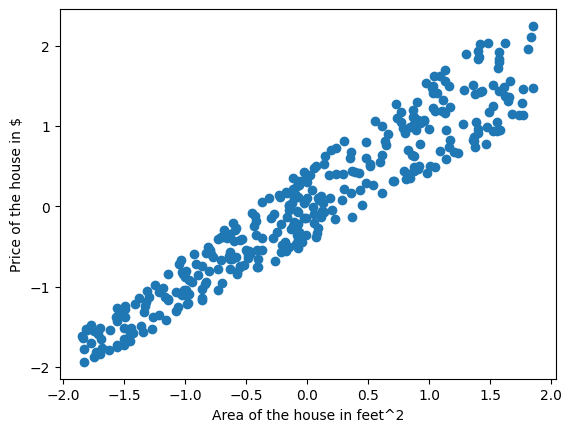

In [218]:
# plot the data
plt.scatter(x_train, y_train)
plt.xlabel('Area of the house in feet^2')
plt.ylabel('Price of the house in $')
plt.show()

In [219]:
def compute_cost(x,y,t0,t1):
    return np.sum((t0 + t1*x - y)**2) / (2*len(x))

In [220]:
# give an initial value to theta0 and theta1
theta0 = np.random.rand() 
theta1 = np.random.rand() 
print(theta0, theta1)

0.775669513791026 0.430042030928002


In [221]:
def gradient(t0, t1, x, y, alpha=0.25, iterations=1000, plot=False):
    costs = []
    while (compute_cost(x,y,t0,t1) > 0.01 and iterations > 0):
        t0 = t0 - alpha * np.sum(t0 + t1*x - y) / len(x)
        t1 = t1 - alpha * np.sum((t0 + t1*x - y)*x) / len(x)
        costs.append(compute_cost(x,y,t0,t1))
        iterations -= 1

    if plot:
        iters = np.arange(0, len(costs))
        plt.plot(iters, costs)
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.show()           


    return t0, t1

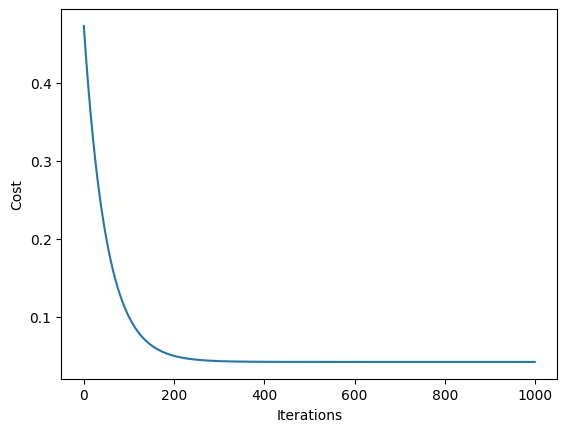

3.348662048893729e-05 0.9569159584452108


In [222]:
theta0, theta1 = gradient(theta0, theta1, x_train, y_train, 0.01, 1000, True)
print(theta0, theta1)

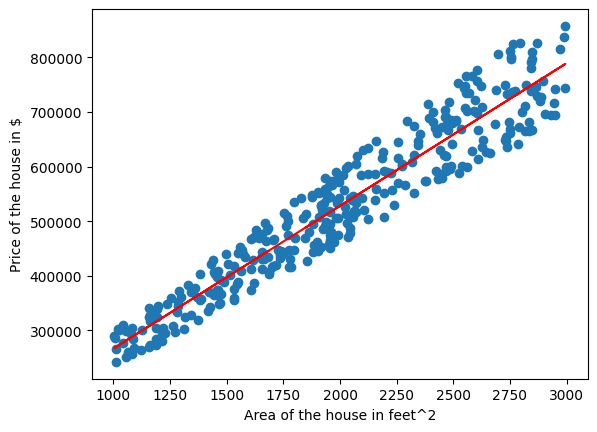

In [223]:
# check the model on the training data
y_train_pred = unnormalize_data(theta0 + theta1*x_train, original_y)
x_train = unnormalize_data(x_train, original_x)
y_train = unnormalize_data(y_train, original_y)
plt.scatter(x_train, y_train)
plt.plot(x_train, y_train_pred, color='red')
plt.xlabel('Area of the house in feet^2')
plt.ylabel('Price of the house in $')
plt.show()


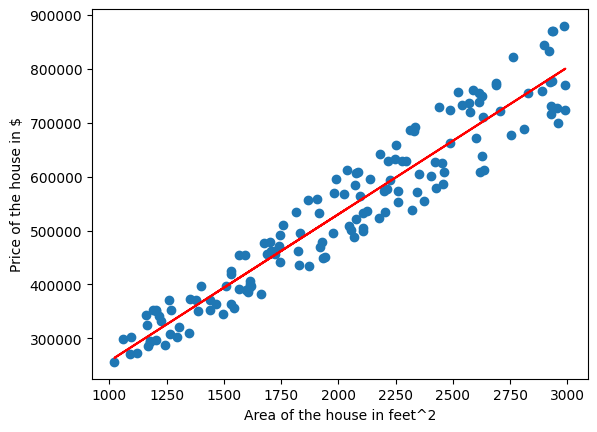

In [224]:
# check the model on the test data
y_test_pred = unnormalize_data(theta0 + theta1* normalize_data(x_test), y_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_pred, c='r')
plt.xlabel("Area of the house in feet^2")
plt.ylabel("Price of the house in $")
plt.show()
# print(y_trained[0:10])

In [225]:
# check the accuracy of the model
# this broken fix it
def r2_score(y, y_pred):
    return 1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2)

score = r2_score(y_test, y_test_pred)
if(score > 0.9):
    print("The model is accurate with a score of", round(score, 5))
else:
    print("The model is not accurate with a score of", round(score, 5))

The model is accurate with a score of 0.91771
